In [3]:
# Import das Bibliotecas
from dotenv import load_dotenv
import psycopg
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Executa a função para carregar as variáveis do arquivo .env no ambiente
load_dotenv()

True

In [ ]:
# Conexão com o banco de dados
def get_db_connection():
    """Cria e retorna uma conexão com o banco de dados."""
    try:
        conn = psycopg.connect(
            host="localhost",
            dbname=os.getenv("DB_NAME"),
            user=os.getenv("DB_USER"),
            password=os.getenv("DB_PASSWORD"),
            port=os.getenv("DB_PORT")
        )
        return conn
    except Exception as e:
        print(f"Erro ao conectar ao banco de dados: {e}")
        raise e

In [6]:
# Estabelecendo a conexão
conn = get_db_connection()

# Estabelecendo o cursor para executar consultas
cursor = conn.cursor()

In [7]:
# Gráfico de linha (x = meses, y= concentração média, cores=cor)
cursor.execute('SELECT * FROM gold.mart_health_vs_air_quality')

# Pegando os dados da consulta
result = cursor.fetchall()

# Pegando os nomes das colunas
columns = cursor.description

# Colocando o nome das colunas 
df = [{columns[index][0]: column for index, column in enumerate(value)} for value in result]

# Transformando de DataFrame para fazer o gráfico
df = pd.DataFrame(df)

In [8]:
# Converter para datetime e extrair o mês
df['year_month'] = pd.to_datetime(df['year_month'])
df['month'] = df['year_month'].dt.month_name()

# Ordenar por data
df.sort_values(by='year_month', inplace=True)

In [9]:
df.columns

Index(['year_month', 'state_code', 'pollutant_code', 'total_health_cases',
       'monthly_avg_pollution', 'month'],
      dtype='object')

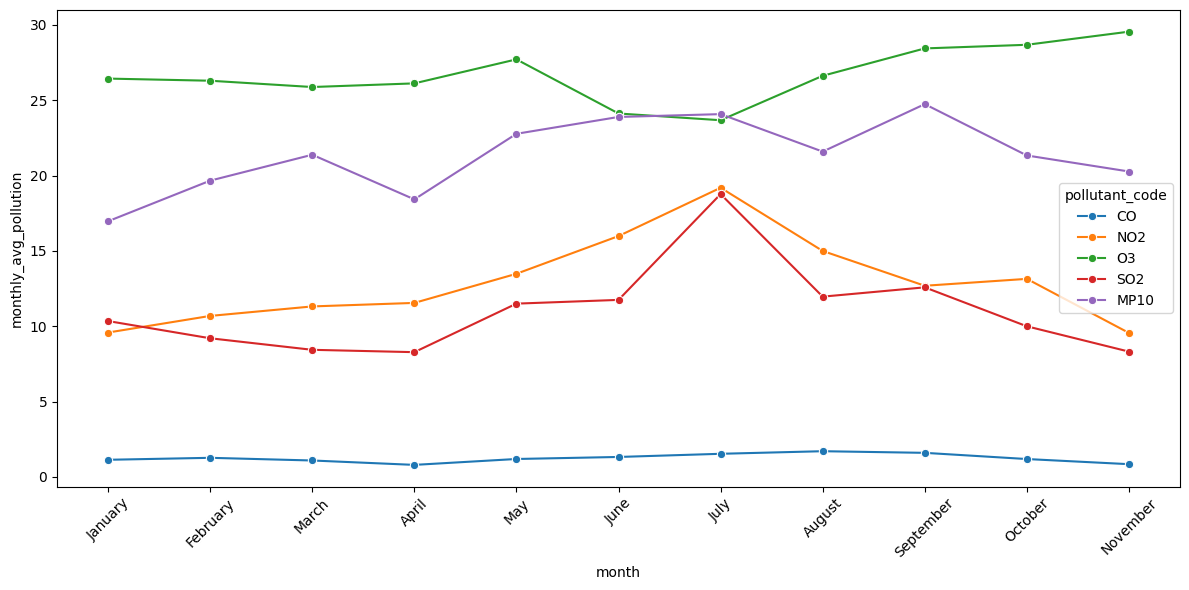

In [10]:
# Gráfico relação Mes x Média de Concentração por cada poluente
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='monthly_avg_pollution', hue='pollutant_code', marker='o', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Esse gráfico é para colocar do MonitorAr vs DataSUS

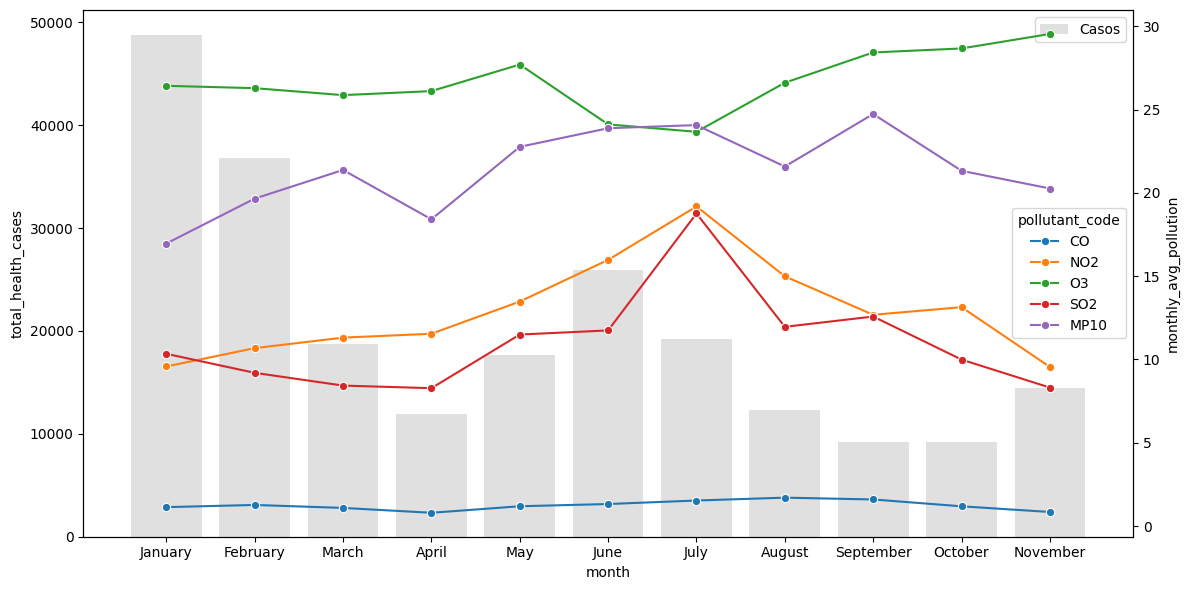

In [11]:
# Gráfico duplo: linha -> Sériel Temporal dos poluentes
#                barras -> número de casos
# Colocar filtros: estado e poluente para o gŕafico não ficar tão poluído
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='month', y='total_health_cases',color='lightgray', alpha=0.7, label='Casos', errorbar=None)
ax2 = plt.twinx()
sns.lineplot(data=df, x='month', y='monthly_avg_pollution', hue='pollutant_code', marker='o', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

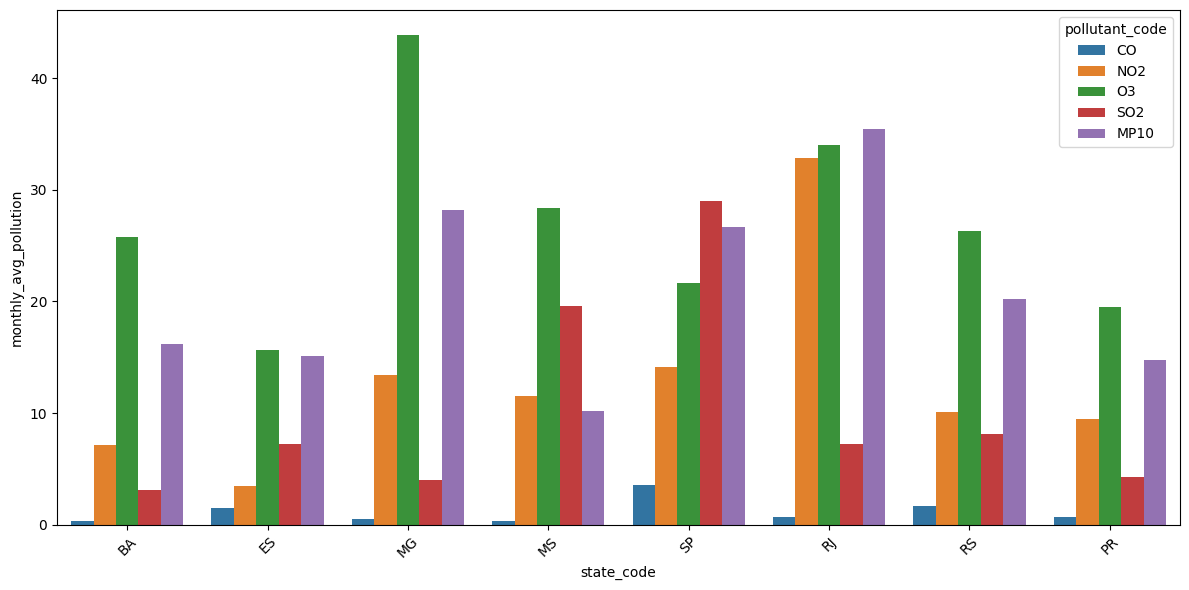

In [12]:
# Gráfico dos Estados com as maiores médias de poluição (por poluente talvez)
plt.subplots(figsize=(12, 6))

sns.barplot(data=df, x='state_code', y='monthly_avg_pollution', hue='pollutant_code', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

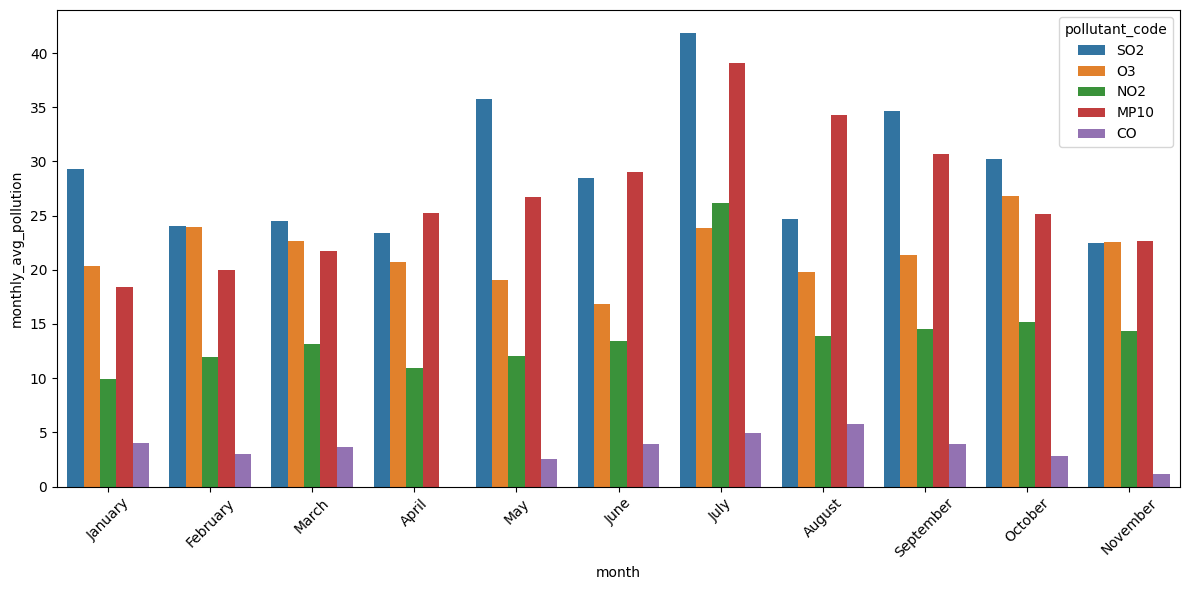

In [ ]:
df_filtrado = df[df['state_code'] == 'SP']

plt.subplots(figsize=(12, 6))

# Gráfico da evolução mensal de todos os poluentes em um estado específico
sns.barplot(data=df_filtrado, x='month', y='monthly_avg_pollution', hue='pollutant_code', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

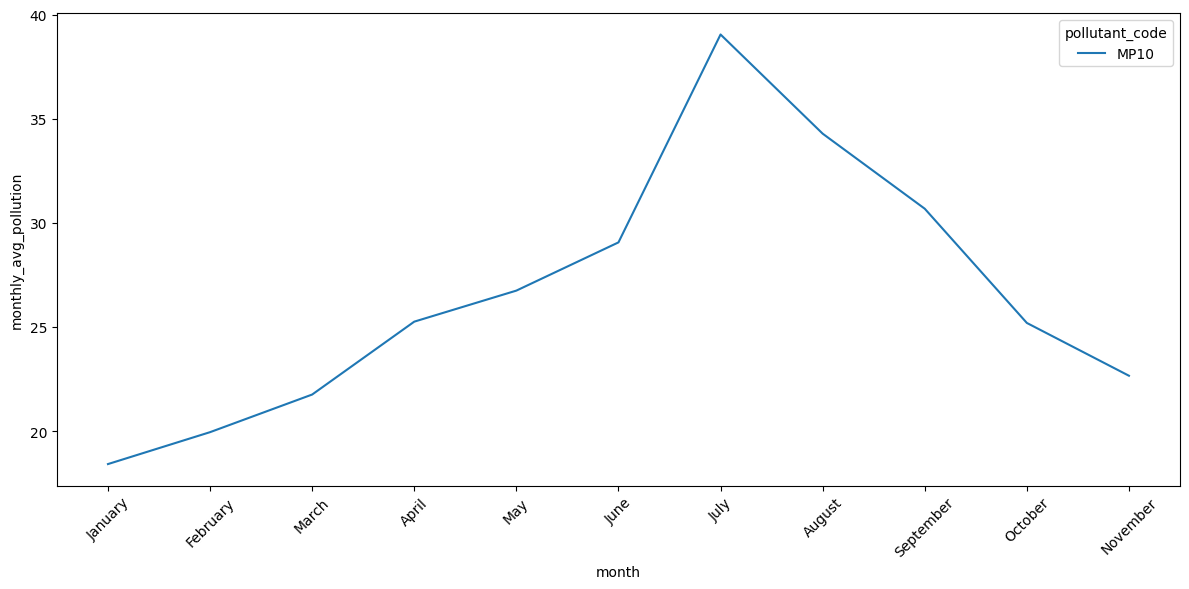

In [ ]:
df_filtrado = df[(df['state_code'] == 'SP') & (df['pollutant_code'] == 'MP10')]

# Gráfico evolução mensal de um poluente específico para um estado específico
# Colocar filtros para selecionar o estado e o poluente
plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_filtrado, x='month', y='monthly_avg_pollution',hue='pollutant_code', errorbar=None)
# sns.barplot(data=df_filtrado, x='month', y='monthly_avg_pollution', hue='pollutant_code', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

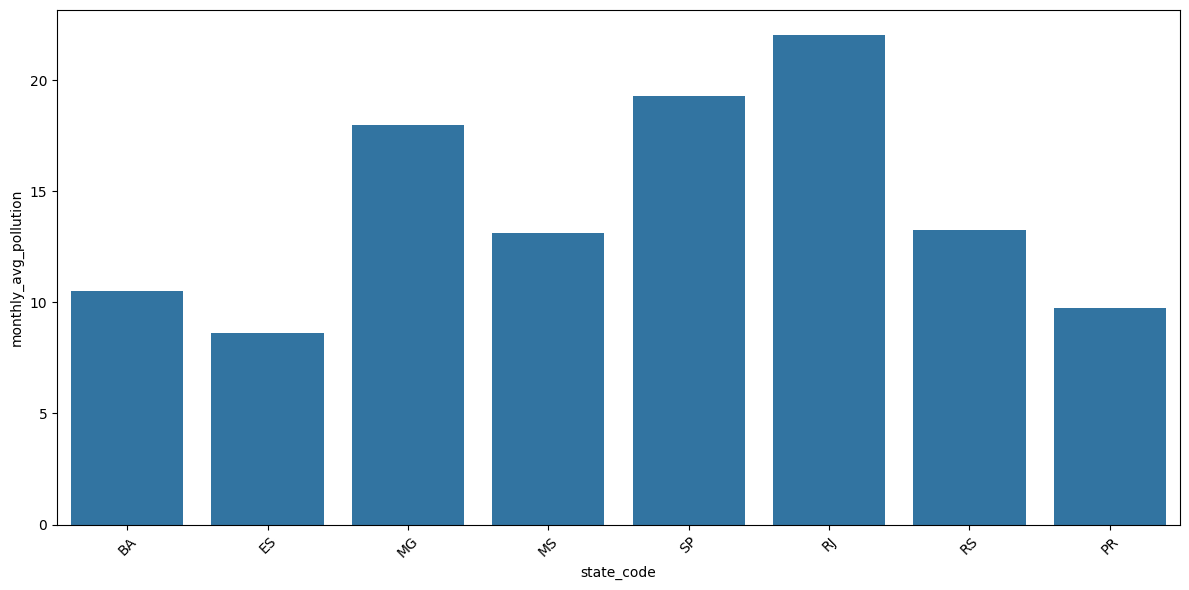

In [ ]:
# Gráfico estados por poluição (média geral de todos os poluentes) (estados mais poluídos)

plt.subplots(figsize=(12, 6))

sns.barplot(data=df, x='state_code', y='monthly_avg_pollution', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()